##Visão Geral do Desafio.
####O projeto consiste em uma conciliação do **valor total de vendas** de recarga de celular por *operadora* e *por loja*
####A Bemol recebe um arquivo de uma empresa financeira (*detalhamento.xlsx*) onde possui o valor consolidado de vendas e o objetivo é verificar se os dados do nosso banco de dados (*vendas.csv*) estão de acordo com o informado.

#Dica:
Os dados do SAP vêm separados por cada transição de venda realizada. A ideia é de agrupar esses dados para deixá-los no formato parecido com que recebemos da empresa externa(*detalhamento.xlsx*) e, assim, poder unificar as tabelas e fazer a comparação.
 
##To-Do List:

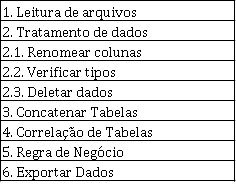






* Leitura de Bases:

In [0]:
import pandas as pd


# 1. Leitura de Arquivos.

In [0]:
df_vendas = pd.read_csv('vendas.csv', sep = '|', skiprows = 0, encoding = 'utf-8')

In [263]:
df_vendas

,Escritório de vendas,Fornecedor,Material,Data,Valor Liquido
0,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",02.01.2020,20.0
1,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",30.12.2019,10.0
2,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",04.01.2020,20.0
3,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",02.01.2020,10.0
4,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",03.01.2020,25.0
...,...,...,...,...,...
5108,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",30.12.2019,20.0
5109,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",04.01.2020,20.0
5110,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",05.01.2020,20.0
5111,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",05.01.2020,45.0


In [0]:
df_detalhamento = pd.concat(pd.read_excel('detalhamento.xlsx', sheet_name=None, skiprows = 1), ignore_index=True)
#Concatenando os Sheets 'AM' 'RR' 'RO' 'AC' em apenas um Sheet.

In [265]:
df_detalhamento

,NomeFantasia,Escritório de vendas,UF,Operadora,Valor Bruto
0,BEMOL AVENIDA,103,AM,Claro,2651
1,BEMOL AVENIDA,103,AM,Oi,3309
2,BEMOL AVENIDA,103,AM,Tim,1550
3,BEMOL AVENIDA,103,AM,Vivo,4739
4,BEMOL BARROSO,107,AM,Claro,1495
...,...,...,...,...,...
157,LOJA BEMOL JI-PARANA,205,RO,Claro,123
158,BEMOL RIO BRANCO,401,AC,Claro,500
159,BEMOL RIO BRANCO,401,AC,Oi,375
160,BEMOL RIO BRANCO,401,AC,Tim,125


# 2. Tratamento de Dados.

##2.1 Renomeando Colunas


In [0]:
df_detalhamento.columns = ['loja_nome', 'loja_id', 'uf', 'operadora', 'valor_bruto']

In [267]:
df_detalhamento

,loja_nome,loja_id,uf,operadora,valor_bruto
0,BEMOL AVENIDA,103,AM,Claro,2651
1,BEMOL AVENIDA,103,AM,Oi,3309
2,BEMOL AVENIDA,103,AM,Tim,1550
3,BEMOL AVENIDA,103,AM,Vivo,4739
4,BEMOL BARROSO,107,AM,Claro,1495
...,...,...,...,...,...
157,LOJA BEMOL JI-PARANA,205,RO,Claro,123
158,BEMOL RIO BRANCO,401,AC,Claro,500
159,BEMOL RIO BRANCO,401,AC,Oi,375
160,BEMOL RIO BRANCO,401,AC,Tim,125


In [0]:
df_vendas.columns = ['loja_id', 'operadora', 'material', 'data', 'valor_liquido']

In [269]:
df_vendas

,loja_id,operadora,material,data,valor_liquido
0,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",02.01.2020,20.0
1,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",30.12.2019,10.0
2,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",04.01.2020,20.0
3,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",02.01.2020,10.0
4,101,Vivo,"131318 RECARGA VIRTUAL VIVO R$ 1,00",03.01.2020,25.0
...,...,...,...,...,...
5108,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",30.12.2019,20.0
5109,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",04.01.2020,20.0
5110,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",05.01.2020,20.0
5111,701,Claro,"131317 RECARGA VIRTUAL CLARO R$ 1,00",05.01.2020,45.0


## 2.2 Verificar Tipos

In [270]:
df_detalhamento.dtypes

loja_nome      object
loja_id         int64
uf             object
operadora      object
valor_bruto     int64
dtype: object

In [271]:
df_vendas.dtypes

loja_id            int64
operadora         object
material          object
data              object
valor_liquido    float64
dtype: object

##2.3 Deletar Dados.

In [0]:
 df_detalhamento = df_detalhamento[[ 'loja_id', 'operadora', 'valor_bruto']].copy()

In [0]:
df_vendas = df_vendas[['loja_id', 'operadora', 'valor_liquido']].copy()

#3. Concatenar Tabelas

In [274]:
df_vendas

,loja_id,operadora,valor_liquido
0,101,Vivo,20.0
1,101,Vivo,10.0
2,101,Vivo,20.0
3,101,Vivo,10.0
4,101,Vivo,25.0
...,...,...,...
5108,701,Claro,20.0
5109,701,Claro,20.0
5110,701,Claro,20.0
5111,701,Claro,45.0


In [275]:
df_detalhamento

,loja_id,operadora,valor_bruto
0,103,Claro,2651
1,103,Oi,3309
2,103,Tim,1550
3,103,Vivo,4739
4,107,Claro,1495
...,...,...,...
157,205,Claro,123
158,401,Claro,500
159,401,Oi,375
160,401,Tim,125


In [0]:
df_vendas = df_vendas.groupby(['loja_id', 'operadora']).agg({'valor_liquido': 'sum'}).reset_index()

In [0]:
df_relatorio = pd.concat([df_vendas, df_detalhamento])

image.png

#4. Correlação de Tabelas.

In [0]:
df_relatorio = df_relatorio.groupby(['loja_id', 'operadora']).agg({'valor_liquido':'first', 'valor_bruto': 'first'}).reset_index()

In [279]:
df_relatorio

,loja_id,operadora,valor_liquido,valor_bruto
0,101,Claro,1527.0,1527.0
1,101,Oi,1730.0,1730.0
2,101,Tim,975.0,975.0
3,101,Vivo,3142.0,3142.0
4,103,Claro,2652.3,2651.0
...,...,...,...,...
158,618,Vivo,561.0,380.0
159,701,Claro,140.0,140.0
160,701,Oi,20.0,20.0
161,701,Tim,135.0,135.0


#5. Regras de Negócio

In [0]:
#Comparação sem condicional, para visualizar 'Falso' para valores conformes e 'True' para valores divergentes.
#df_relatorio['status'] = (df_relatorio['valor_liquido'] != df_relatorio['valor_bruto'])

In [0]:
#Utilizando replace para apontar os valores na tabela: 

# replace_dict = {
    #True: "Conforme",
    #False: 'Alerta' }

In [0]:
#Atribundo os valores a tabela 'Status'
# df_relatorio = df_relatorio['status'].replace(replace_dict)

Outra maneira: 

In [0]:
df_relatorio['status'] = df_relatorio['valor_bruto'] - df_relatorio['valor_liquido'] 

In [0]:
df_relatorio['status'] = df_relatorio['status'].apply(lambda x: 'Conforme!' if x == 0.0 else 'Alerta')

In [327]:
df_relatorio

,loja_id,operadora,valor_liquido,valor_bruto,status
0,101,Claro,1527.0,1527.0,Conforme!
1,101,Oi,1730.0,1730.0,Conforme!
2,101,Tim,975.0,975.0,Conforme!
3,101,Vivo,3142.0,3142.0,Conforme!
4,103,Claro,2652.3,2651.0,Alerta
...,...,...,...,...,...
158,618,Vivo,561.0,380.0,Alerta
159,701,Claro,140.0,140.0,Conforme!
160,701,Oi,20.0,20.0,Conforme!
161,701,Tim,135.0,135.0,Conforme!


#6. Exportar Dados

In [0]:
writer = pd.ExcelWriter('Relatório.xlsx')

df_relatorio.to_excel(writer, sheet_name='relatorio_final', index=False)

writer.save()